# TFBS from motifs

## Setup a CombObj

In [1]:
import tfcomb.objects
C = tfcomb.objects.CombObj()

## Search for TFBS within enhancer regions

In [2]:
C.TFBS_from_motifs(regions = "../data/GM12878_enhancers_chr1.bed", 
                   motifs = "../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome = "../data/hg38_chr1.fa.gz", 
                   threads = 4)

INFO: Scanning for TFBS with 4 core(s)...
INFO: Identified 180898 TFBS within given regions


## Count co-occurring TFs

In [3]:
C.count_within()

INFO: Counting co-occurring TFs from .TFBS...
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs


## Perform market basket analysis

In [4]:
C.market_basket()

INFO: Market basket analysis is done! Results are found in .rules


In [5]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,confidence,lift,cosine,jaccard
0,SP2,SP1,1536,1069,914,180898,0.008491,0.005909,0.005053,1.436857,284.381329,1.553922,3.436242
1,SP1,SP2,1536,914,1069,180898,0.008491,0.005053,0.005909,1.680525,284.381329,1.553922,3.436242
2,SP3,SP1,1282,961,914,180898,0.007087,0.005312,0.005053,1.334027,264.029350,1.367896,2.161889
3,SP1,SP3,1282,914,961,180898,0.007087,0.005053,0.005312,1.402626,264.029350,1.367896,2.161889
4,ZNF467,MAZ,1939,1447,1657,180898,0.010719,0.007999,0.009160,1.340014,146.291986,1.252225,1.664378


## Visualize rules

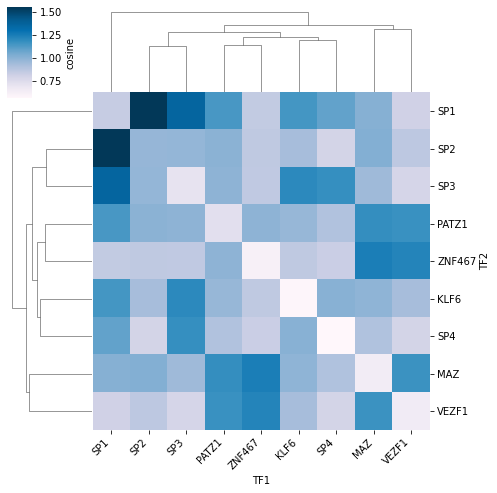

In [6]:
_ = C.plot_heatmap()

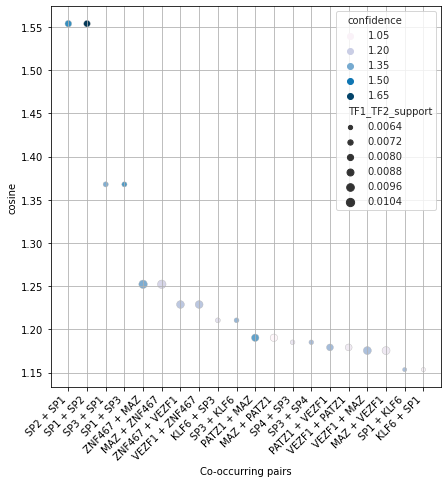

In [7]:
_ = C.plot_bubble()